# Movie_Recomender-System-Using_Machine_Learning(NLP)

In [1]:
from IPython.display import Image
import os
!ls ../input/movie-image

movie.jpg


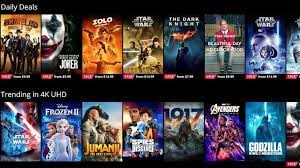

In [2]:
Image("/kaggle/input/movie-image/movie.jpg",width=700,height=300)

# Import Libraries And Load

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
movies=pd.read_csv('/kaggle/input/movies/tmdb_5000_movies.csv',sep=',')
credits=pd.read_csv('/kaggle/input/tmdb-credits/tmdb_5000_credits.csv')

## Check Overview Movies DataFrame

In [5]:
# Check column movies Dataframe
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
# Count Column And Row
movies.shape

(4803, 20)

**DataSet Movies Has**
- 4803 Columns
- 20 Rows

**Check Overview Credit Dataframe**

In [7]:
credits.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
### Count cloumns and rows
credits.shape

(4803, 4)

**DataSet Credits Has:**
- 4803 Columns
- 4 Rows

In [9]:
movies=movies.merge(credits,on='title')

In [10]:
# content based recomeneded sysytem--> categorical data is prime focused
# Keeping important columns for recomendation

movies=movies[["movie_id","title","overview",'genres','keywords','cast','crew']]

In [11]:
movies.head(5)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
# Checking if ther any null value or not
movies.shape

(4809, 7)

**Checking If There Any Null Value Or Not**

In [13]:

movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

- We can see that there are 3 null values in overview variable

**Drop The Missing Value**

In [14]:
movies.dropna(inplace=True)

In [15]:
# Recheck
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [16]:
movies.shape

(4806, 7)

**Check Duplicate Value**

In [17]:
movies.duplicated().sum()

0

- Here we can see that none of the values are duplicated

In [18]:
# Handle Genres
# I want to make a paragraph to generate for that i want to concate the things
movies.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [19]:
# Building Function
# For converting str to list
import ast 
def convert(text):
    L=[]
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L

In [20]:
# Apply Convert Value For Dataframe
movies['genres']=movies['genres'].apply(convert)

In [21]:
# Recheck
movies.head(5)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [22]:
# Handle keywords

movies.iloc[0]['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [23]:
movies['keywords']=movies['keywords'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [24]:
# Handle Convert Cast
movies.iloc[0]['cast']

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [25]:
# Handle Crew
movies.iloc[0]['crew']

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [26]:
def fetch_director(text):
    L=[]
    for i in ast.literal_eval(text):
        if i['job']=='Director':
            L.append(i['name'])
            break
    return L

In [27]:
movies['crew']=movies['crew'].apply(fetch_director)

In [28]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",[Andrew Stanton]


In [29]:
# Handle Overview (Converting To List)
movies.iloc[0]['overview']

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [30]:
movies['overview']=movies['overview'].apply(lambda x:x.split())

In [31]:
movies.sample(4)

,movie_id,title,overview,genres,keywords,cast,crew
1281,266396,The Gunman,"[Eight, years, after, fleeing, the, Congo, fol...","[Action, Drama, Crime]","[assassin, hitman]","[{""cast_id"": 1, ""character"": ""Terrier"", ""credi...",[Pierre Morel]
1675,2008,The Promise,"[An, orphaned, girl,, driven, by, poverty, at,...","[Fantasy, Drama, Action, Thriller, Romance]","[servant, emperor, battle assignment]","[{""cast_id"": 13, ""character"": ""Princess Qingch...",[Chen Kaige]
2758,264660,Ex Machina,"[Caleb,, a, 26, year, old, coder, at, the, wor...","[Drama, Science Fiction]","[dancing, artificial intelligence, distrust, i...","[{""cast_id"": 1, ""character"": ""Caleb Smith"", ""c...",[Alex Garland]
2533,11153,National Lampoon's Vacation,"[Clark, Griswold, is, on, a, quest, to, take, ...","[Comedy, Adventure, Romance]","[usa, relatives, family vacation, family holid...","[{""cast_id"": 1, ""character"": ""Clark Griswold"",...",[Harold Ramis]


In [32]:
# Recheck
movies.iloc[0]['overview']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

In [33]:
# Now removing space like that
'Anaa Kendrick'
'AnnaKendrick'

def remove_space(L):
    L1=[]
    for i in L:
        L1.append(i.replace("",""))
    return L1

In [34]:
movies['cast']=movies['cast'].apply(remove_space)
movies['crew']=movies['crew'].apply(remove_space)
movies['genres']=movies['genres'].apply(remove_space)
movies['keywords']=movies['keywords'].apply(remove_space)

In [35]:
movies['tags']=movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['crew']

In [36]:
movies.iloc[0]['tags']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d',
 '[',
 '{',
 '"',
 'c',
 'a',
 's',
 't',
 '_',
 'i',
 'd',
 '"',
 ':',
 ' ',
 '2',
 '4',
 '2',
 ',',
 ' ',
 '"',
 'c',
 'h',
 'a',
 'r',
 'a',
 'c',
 't',
 'e',
 'r',
 '"',
 ':',
 ' ',
 '"',
 'J',
 'a',
 'k',
 'e',
 ' ',
 'S',
 'u',
 'l',
 'l',
 'y',
 '"',
 ',',
 ' ',
 '"',
 'c',
 'r',
 'e',
 'd',
 'i',
 't',
 '_',
 'i',
 'd',
 '"',
 ':',
 ' ',
 '"',
 '5',
 '6',
 '0',
 '2'

**Droping Those Extra Columns**

In [37]:
new_df=movies[['movie_id','title','tags']]

In [38]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


**Converting List To str**

In [39]:
new_df['tags']=new_df['tags'].apply(lambda x: " ".join(x))
new_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [40]:
new_df.iloc[0].tags

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy Science Fiction culture clash future space war space colony society space travel futuristic romance space alien tribe alien planet cgi marine soldier battle love affair anti war power relations mind and soul 3d [ { " c a s t _ i d " :   2 4 2 ,   " c h a r a c t e r " :   " J a k e   S u l l y " ,   " c r e d i t _ i d " :   " 5 6 0 2 a 8 a 7 c 3 a 3 6 8 5 5 3 2 0 0 1 c 9 a " ,   " g e n d e r " :   2 ,   " i d " :   6 5 7 3 1 ,   " n a m e " :   " S a m   W o r t h i n g t o n " ,   " o r d e r " :   0 } ,   { " c a s t _ i d " :   3 ,   " c h a r a c t e r " :   " N e y t i r i " ,   " c r e d i t _ i d " :   " 5 2 f e 4 8 0 0 9 2 5 1 4 1 6 c 7 5 0 a c 9 c b " ,   " g e n d e r " :   1 ,   " i d " :   8 6 9 1 ,   " n a m e " :   " Z o e   S a l d a n a " ,   " o r d e r " :   1 } ,   {

In [41]:
# Converting To Lower Case
new_df['tags']=new_df['tags'].apply(lambda x:x.lower())


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
new_df.iloc[0].tags

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy science fiction culture clash future space war space colony society space travel futuristic romance space alien tribe alien planet cgi marine soldier battle love affair anti war power relations mind and soul 3d [ { " c a s t _ i d " :   2 4 2 ,   " c h a r a c t e r " :   " j a k e   s u l l y " ,   " c r e d i t _ i d " :   " 5 6 0 2 a 8 a 7 c 3 a 3 6 8 5 5 3 2 0 0 1 c 9 a " ,   " g e n d e r " :   2 ,   " i d " :   6 5 7 3 1 ,   " n a m e " :   " s a m   w o r t h i n g t o n " ,   " o r d e r " :   0 } ,   { " c a s t _ i d " :   3 ,   " c h a r a c t e r " :   " n e y t i r i " ,   " c r e d i t _ i d " :   " 5 2 f e 4 8 0 0 9 2 5 1 4 1 6 c 7 5 0 a c 9 c b " ,   " g e n d e r " :   1 ,   " i d " :   8 6 9 1 ,   " n a m e " :   " z o e   s a l d a n a " ,   " o r d e r " :   1 } ,   {

In [43]:
# Converting  To Lower Case
new_df['tags']=new_df['tags'].apply(lambda x:x.lower())


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [45]:
new_df.iloc[0].tags

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy science fiction culture clash future space war space colony society space travel futuristic romance space alien tribe alien planet cgi marine soldier battle love affair anti war power relations mind and soul 3d [ { " c a s t _ i d " :   2 4 2 ,   " c h a r a c t e r " :   " j a k e   s u l l y " ,   " c r e d i t _ i d " :   " 5 6 0 2 a 8 a 7 c 3 a 3 6 8 5 5 3 2 0 0 1 c 9 a " ,   " g e n d e r " :   2 ,   " i d " :   6 5 7 3 1 ,   " n a m e " :   " s a m   w o r t h i n g t o n " ,   " o r d e r " :   0 } ,   { " c a s t _ i d " :   3 ,   " c h a r a c t e r " :   " n e y t i r i " ,   " c r e d i t _ i d " :   " 5 2 f e 4 8 0 0 9 2 5 1 4 1 6 c 7 5 0 a c 9 c b " ,   " g e n d e r " :   1 ,   " i d " :   8 6 9 1 ,   " n a m e " :   " z o e   s a l d a n a " ,   " o r d e r " :   1 } ,   {

## Building Model NLP

In [46]:
import nltk
from nltk.stem import PorterStemmer

In [47]:
ps=PorterStemmer()

**Building Function Handle Text**

In [48]:
def stems(text):
    T=[]
    
    for i in text.split():
        T.append(ps.stem(i))
    return ' '.join(T)

In [49]:
new_df['tags']=new_df['tags'].apply(stems)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
new_df.iloc[0]['tags']

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi scienc fiction cultur clash futur space war space coloni societi space travel futurist romanc space alien tribe alien planet cgi marin soldier battl love affair anti war power relat mind and soul 3d [ { " c a s t _ i d " : 2 4 2 , " c h a r a c t e r " : " j a k e s u l l y " , " c r e d i t _ i d " : " 5 6 0 2 a 8 a 7 c 3 a 3 6 8 5 5 3 2 0 0 1 c 9 a " , " g e n d e r " : 2 , " i d " : 6 5 7 3 1 , " n a m e " : " s a m w o r t h i n g t o n " , " o r d e r " : 0 } , { " c a s t _ i d " : 3 , " c h a r a c t e r " : " n e y t i r i " , " c r e d i t _ i d " : " 5 2 f e 4 8 0 0 9 2 5 1 4 1 6 c 7 5 0 a c 9 c b " , " g e n d e r " : 1 , " i d " : 8 6 9 1 , " n a m e " : " z o e s a l d a n a " , " o r d e r " : 1 } , { " c a s t _ i d " : 2 5 , " c h a r a c t e r " : " d r . g r a c e a u g u s t i n e " ,

In [51]:
from  sklearn.feature_extraction.text import CountVectorizer
# Counter Vector Indetifies Unique Word
cv=CountVectorizer(max_features=5000,stop_words='english')

In [52]:
vector=cv.fit_transform(new_df['tags']).toarray()

In [53]:
vector[0]

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
vector.shape

(4806, 5000)

In [55]:
len(cv.get_feature_names())

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


5000

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
similarity= cosine_similarity(vector)

In [58]:
similarity.shape

(4806, 4806)

In [59]:
new_df[new_df['title']=='The Lego Movie'].index[0]

744

In [60]:
def recommend(movie):
    index=new_df[new_df['title']==movie].index[0]
    distances =sorted(list(enumerate(similarity[index])),reverse=True,key=lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].title)

In [61]:
recommend("Superman")

Superman Returns
Superman II
Superman III
Superman IV: The Quest for Peace
X-Men: Apocalypse
